## # Scikit-learn - Guide de référence rapide


> Pense-bête complet pour maîtriser Scikit-learn - Bibliothèque fondamentale pour le machine learning en Python

---


## Table des matières


1. [Installation et import](#installation-et-import)
2. [Préparation des données](#préparation-des-données)
3. [Classification](#classification)
4. [Régression](#régression)
5. [Clustering](#clustering)
6. [Réduction de dimensionnalité](#réduction-de-dimensionnalité)
7. [Sélection de modèles](#sélection-de-modèles)
8. [Évaluation des modèles](#évaluation-des-modèles)
9. [Pipeline et preprocessing](#pipeline-et-preprocessing)
10. [Méthodes utiles supplémentaires](#méthodes-utiles-supplémentaires)

---


## Installation et import


In [2]:
import sklearn
from sklearn import datasets, model_selection, metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline


**Convention standard** : importer les modules spécifiques selon les besoins.

**Installation** :


---


## Préparation des données


In [4]:
from sklearn import datasets

# Datasets intégrés
iris = datasets.load_iris()        # Classification
digits = datasets.load_digits()    # Classification
wine = datasets.load_wine()        # Classification
# boston = datasets.load_boston()    # Régression (obsolète)
diabetes = datasets.load_diabetes()  # Régression

# Accès aux données
X = iris.data          # Features (caractéristiques)
y = iris.target        # Labels (cibles)
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Shape de X: {X.shape}")      # (150, 4)
print(f"Shape de y: {y.shape}")      # (150,)


Shape de X: (150, 4)
Shape de y: (150,)


In [5]:
from sklearn.model_selection import train_test_split

# Division simple (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Avec stratification (pour classification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Division avec shuffle
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)


In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Standardisation (moyenne=0, écart-type=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # ⚠️ Utiliser transform, pas fit_transform

# Normalisation Min-Max (0-1)
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

# RobustScaler (résistant aux outliers)
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test)


In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# LabelEncoder (pour les targets)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# OneHotEncoder (pour les features)
onehot = OneHotEncoder(sparse=False)
X_categorical_encoded = onehot.fit_transform(X_categorical)

# OrdinalEncoder (encodage ordinal)
ordinal = OrdinalEncoder()
X_ordinal = ordinal.fit_transform(X_categorical)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

### Chargement de datasets



### Division train/test



**Schéma conceptuel :**


### Normalisation et standardisation



**Différence entre les scalers :**


### Encodage des variables catégorielles



---


## Classification


In [8]:
from sklearn.linear_model import LogisticRegression

# Créer et entraîner le modèle
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Probabilités

# Score
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 1.000


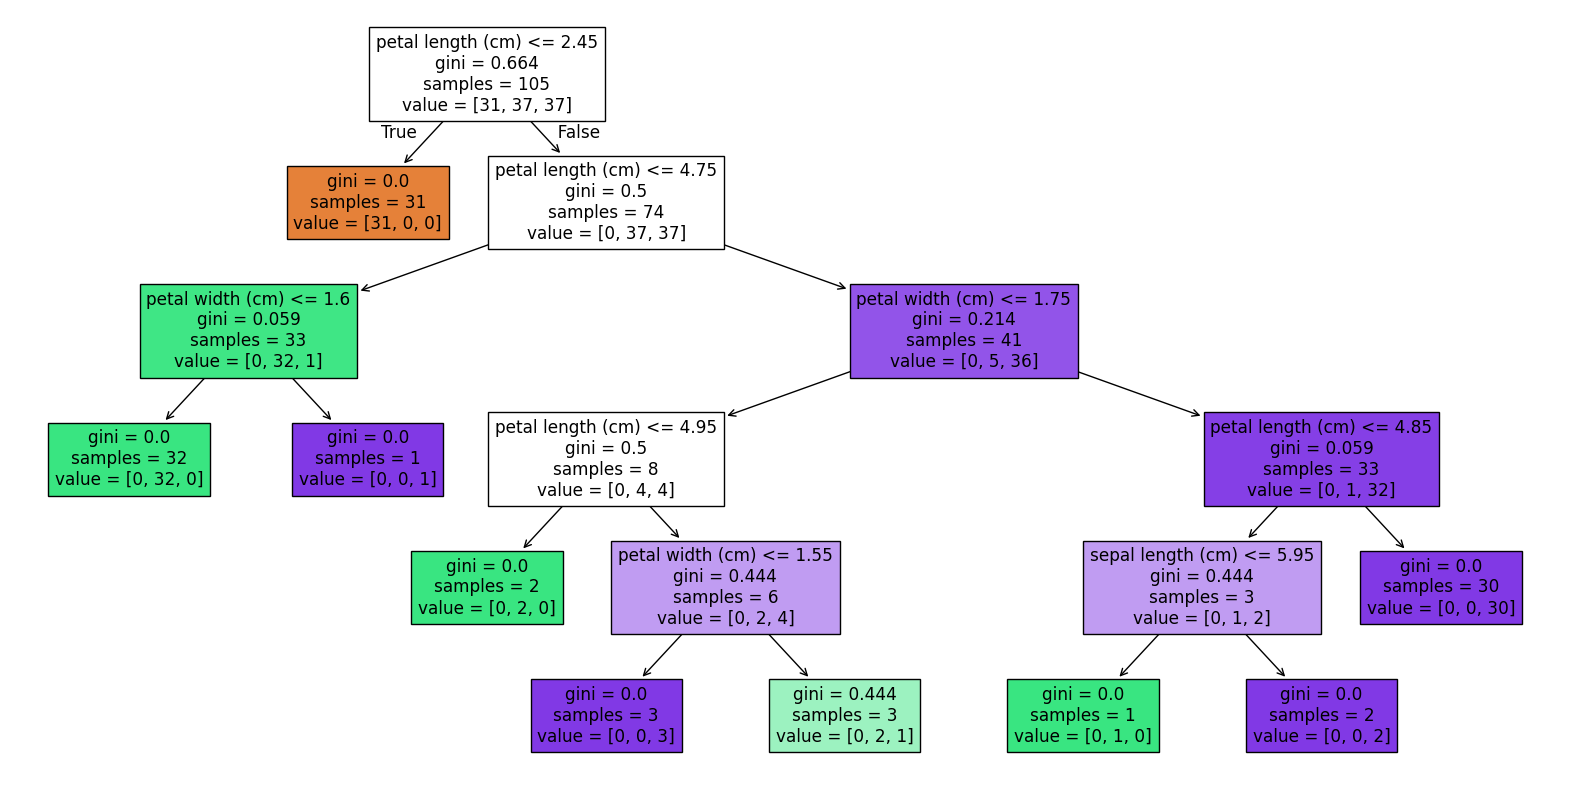

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Créer et entraîner
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Visualiser l'arbre (nécessite graphviz)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=feature_names)
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Créer et entraîner
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Importance des features
importances = model.feature_importances_
for i, importance in enumerate(importances):
    print(f"{feature_names[i]}: {importance:.3f}")


sepal length (cm): 0.105
sepal width (cm): 0.041
petal length (cm): 0.417
petal width (cm): 0.437


In [11]:
from sklearn.svm import SVC

# Créer et entraîner
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Différents kernels
model_linear = SVC(kernel='linear')
model_poly = SVC(kernel='poly', degree=3)
model_rbf = SVC(kernel='rbf')


In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Créer et entraîner
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)


In [13]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Gaussian Naive Bayes (pour données continues)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Multinomial Naive Bayes (pour données discrètes)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


### Régression logistique



### Arbre de décision



### Random Forest



### SVM (Support Vector Machine)



### K-Nearest Neighbors (KNN)



### Naive Bayes



---


## Régression


In [14]:
from sklearn.linear_model import LinearRegression

# Créer et entraîner
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Score (R²)
r2_score = model.score(X_test, y_test)
print(f"R² Score: {r2_score:.3f}")


Coefficients: [-0.10753506 -0.05844926  0.2647557   0.52929416]
Intercept: 0.18080804062267553
R² Score: 0.944


In [15]:
from sklearn.linear_model import Ridge

# Créer et entraîner (avec régularisation L2)
model = Ridge(alpha=1.0)  # alpha = force de régularisation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [16]:
from sklearn.linear_model import Lasso

# Créer et entraîner (avec régularisation L1)
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [17]:
from sklearn.linear_model import ElasticNet

# Combinaison de Ridge et Lasso
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Créer un pipeline
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


###  linéaire



### Ridge Regression



### Lasso Regression



### Elastic Net



###  polynomiale



### Random Forest Regressor



---


## Clustering


In [20]:
from sklearn.cluster import KMeans

# Créer et entraîner
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# Prédictions (assignation aux clusters)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Inertia (somme des distances au carré)
inertia = kmeans.inertia_
print(f"Inertia: {inertia:.3f}")


Inertia: 78.851


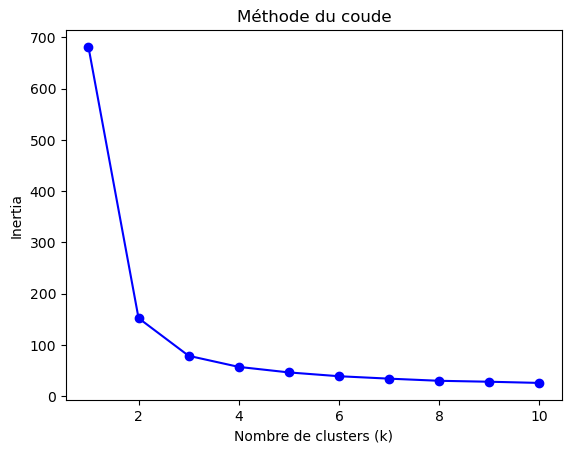

In [21]:
import matplotlib.pyplot as plt
import numpy as np

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Visualiser
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertia')
plt.title('Méthode du coude')
plt.show()


In [22]:
from sklearn.cluster import DBSCAN

# Créer et entraîner
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Nombre de clusters (excluant le bruit -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Nombre de clusters: {n_clusters}")


Nombre de clusters: 2


In [23]:
from sklearn.cluster import AgglomerativeClustering

# Créer et entraîner
clustering = AgglomerativeClustering(n_clusters=3)
labels = clustering.fit_predict(X)


### K-Means



### Trouver le nombre optimal de clusters (Elbow method)



### DBSCAN



### Agglomerative 



---


## Réduction de dimensionnalité


In [24]:
from sklearn.decomposition import PCA

# Créer et appliquer PCA
pca = PCA(n_components=2)  # Réduire à 2 dimensions
X_pca = pca.fit_transform(X)

# Variance expliquée
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée: {explained_variance}")
print(f"Variance totale: {sum(explained_variance):.3f}")

# Choisir le nombre de composantes pour expliquer X% de variance
pca = PCA(n_components=0.95)  # 95% de variance
X_pca = pca.fit_transform(X)


Variance expliquée: [0.92461872 0.05306648]
Variance totale: 0.978


In [25]:
from sklearn.manifold import TSNE

# Créer et appliquer t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)


In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA pour réduction de dimensionnalité supervisée
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)


### PCA (Principal Component Analysis)



### t-SNE



### LDA (Linear Discriminant Analysis)



---


## Sélection de modèles


In [ ]:
from sklearn.model_selection import cross_val_score

# Validation croisée K-fold
model = LogisticRegression(random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Scores: {scores}")
print(f"Moyenne: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")


In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

# Créer le modèle
model = SVC()

# Grid Search avec validation croisée
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print(f"Meilleurs paramètres: {grid_search.best_params_}")
print(f"Meilleur score: {grid_search.best_score_:.3f}")

# Utiliser le meilleur modèle
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Distribution des hyperparamètres
param_distributions = {
    'C': uniform(0.1, 100),
    'gamma': uniform(0.001, 1),
    'kernel': ['rbf', 'linear', 'poly']
}

# Random Search
random_search = RandomizedSearchCV(
    SVC(), param_distributions, n_iter=50, cv=5, 
    scoring='accuracy', random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)


### Validation croisée



### Grid Search



### Random Search



---


## Évaluation des modèles


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Métriques de base
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(cm)

# Rapport de classification
report = classification_report(y_test, y_pred)
print(report)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculer les probabilités
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculer ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Visualiser
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### Métriques de classification



### Métriques de régression



### Courbe ROC (pour classification binaire)



### Courbe de précision-rappel



---


## Pipeline et preprocessing


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Créer un pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Entraîner
pipeline.fit(X_train, y_train)

# Prédire
y_pred = pipeline.predict(X_test)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('pca', PCA(n_components=10)),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Définir les colonnes
numeric_features = [0, 1, 2]
categorical_features = [3, 4]

# Créer le transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Utiliser dans un pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])


### Pipeline simple



### Pipeline avec plusieurs étapes



### ColumnTransformer (pour différentes transformations)



---


## Méthodes utiles supplémentaires


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Sélectionner les K meilleures features
selector = SelectKBest(f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Features sélectionnées
selected_features = selector.get_support(indices=True)
print(f"Features sélectionnées: {selected_features}")


In [ ]:
from sklearn.impute import SimpleImputer

# Imputer avec la moyenne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Autres stratégies
imputer_median = SimpleImputer(strategy='median')
imputer_mode = SimpleImputer(strategy='most_frequent')
imputer_constant = SimpleImputer(strategy='constant', fill_value=0)


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 7)
train_scores, val_scores = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range,
    cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.semilogx(param_range, train_mean, 'o-', label='Training score')
plt.semilogx(param_range, val_mean, 'o-', label='Validation score')
plt.xlabel('Gamma')
plt.ylabel('Score')
plt.legend()
plt.show()


In [ ]:
import joblib

# Sauvegarder
joblib.dump(model, 'model.pkl')

# Charger
model = joblib.load('model.pkl')

# Sauvegarder un pipeline
joblib.dump(pipeline, 'pipeline.pkl')


In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


### Feature selection



### Imputation des valeurs manquantes



### Learning curves



### Validation curves



### Sauvegarde et chargement de modèles



### Feature importance (Random Forest)



---


## Récapitulatif des conventions importantes


### Syntaxe de base

| Opération | Syntaxe |
|-----------|---------|
| Créer modèle | `model = Classifier()` |
| Entraîner | `model.fit(X_train, y_train)` |
| Prédire | `y_pred = model.predict(X_test)` |
| Score | `score = model.score(X_test, y_test)` |

### Workflow standard



### Types de problèmes

| Type | Algorithmes | Métriques |
|------|-------------|-----------|
| Classification | LogisticRegression, RandomForest, SVM, KNN | Accuracy, Precision, Recall, F1 |
| Régression | LinearRegression, Ridge, Lasso, RandomForest | MSE, RMSE, MAE, R² |
| Clustering | KMeans, DBSCAN, Agglomerative | Inertia, Silhouette Score |

### Preprocessing important

- **Scaling** : Toujours scaler pour SVM, KNN, réseaux de neurones
- **Encoding** : Encoder les variables catégorielles
- **Imputation** : Gérer les valeurs manquantes
- **Feature selection** : Réduire la dimensionnalité si nécessaire

---


## Ressources supplémentaires


- **Documentation officielle** : https://scikit-learn.org/stable/
- **Guide utilisateur** : https://scikit-learn.org/stable/user_guide.html
- **Tutoriels** : https://scikit-learn.org/stable/tutorial/
- **Exemples** : https://scikit-learn.org/stable/auto_examples/

---

*Document créé pour servir de pense-bête Scikit-learn - Mise à jour régulière recommandée*
